# **TASK 1(Naive Bayse)**

### Predicting Movie Reviews Sentiment using Naive Bayse


> Indented block







# **Load Dataset from Google drive**

In [ ]:
import collections

In [ ]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

In [ ]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Viewing the data in the folder present from the drive
!ls "/content/drive/My Drive/"

#unzip the movie_review folder
!unzip -q "/content/drive/My Drive/movie_reviews.zip"

 bb0c9c4a2838ecf.pdf
'Capture (1).PNG'
'Capture (2).PNG'
'Capture (3).PNG'
'Capture (4).PNG'
'Capture (5).PNG'
'Capture (6).PNG'
 Capture.PNG
 CASS.zip
 Classroom
'Colab Notebooks'
 Digital+design_Morris+Mano_5th+edition.pdf
'Electronic 11th.pdf'
 Electronic+Devices+and+Circuit+Theory+by+Robert+L.+Boylestad+11th+ed..pdf
'Getting started.pdf'
'Meet Recordings'
 movie_reviews.zip
'New folder'
 plantation.odt
 Resume_i170052.pdf
'Software Engineering by Somerville.gdoc'


In [ ]:
import os
import pandas as pd
os.chdir('/content/movie_reviews/large_movie_review_dataset/train/pos')
!pwd
train_pos = glob.glob("/content/movie_reviews/large_movie_review_dataset/train/pos/*.txt")
os.chdir('/content/movie_reviews/large_movie_review_dataset/train/neg')
!pwd
train_neg = glob.glob("/content/movie_reviews/large_movie_review_dataset/train/neg/*.txt")
os.chdir('/content/movie_reviews/large_movie_review_dataset/test/pos')
!pwd
test_pos = glob.glob("/content/movie_reviews/large_movie_review_dataset/test/pos/*.txt")
os.chdir('/content/movie_reviews/large_movie_review_dataset/test/neg')
!pwd
test_neg = glob.glob("/content/movie_reviews/large_movie_review_dataset/test/neg/*.txt")

/content/movie_reviews/large_movie_review_dataset/train/pos
/content/movie_reviews/large_movie_review_dataset/train/neg
/content/movie_reviews/large_movie_review_dataset/test/pos
/content/movie_reviews/large_movie_review_dataset/test/neg


# **Data Preprocessing**

In [ ]:
print(len(train_pos))
print(len(train_neg))
print(len(test_pos))
print(len(test_neg))

12500
12500
12500
12500


In [ ]:
 classes = 5
 total_examples = 10
 def read_train_files(data_files): 
  all_data = ''
  i=0
  for data_file in data_files:
    #if(i == 2500):
      #break
    i+=1
    #print('Reading file {}'.format(data_file))
    all_data+=(open(data_file, 'r').read())
    #print('Total length read so far is {}'.format(len(all_data)))    
    all_data += '\n'
  return all_data,i

In [ ]:
def read_test_files(data_files): 
  all_data = []
  file_data=[]
  i=0
  for data_file in data_files:
    if(i == 1000):
      break
    i+=1
    #print('Reading file {}'.format(data_file))
    file_data.append(open(data_file, 'r').read())
    #print('Total length read so far is {}'.format(len(all_data)))
    all_data.append(file_data)
    file_data=[]
  return all_data

In [ ]:
result=read_train_files(train_pos) #string of all examples
train_p=result[0]
c1_len=result[1]
result=read_train_files(train_neg) #string of all examples
train_n=result[0]
c2_len=result[1]
test_p=read_test_files(test_pos)  #list of all examples
test_n=read_test_files(test_neg)  #list of all examples
print(len(train_p.split()))
#print(train_p)
print(len(train_n.split()))
#print(train_n)
print(len(test_p))
#print(test_p[0])
print(len(test_n))


2958832
2885848
1000
1000


# **Tokenization**

In [ ]:
#This function will convert every character to lower case if there exists any
def lower_case(dataset):
  return dataset.lower()

In [ ]:
#This function will convert the string into tokens
def Tokenization(dataset):
  dataset = lower_case(dataset)
  return sorted(dict(collections.Counter(dataset.split())).items(), key=lambda k: k[1], reverse=True)
  

In [ ]:
p_train=Tokenization(train_p)
n_train=Tokenization(train_n)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english')) 
stop_words.add('/><br')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Train_NB**

In [ ]:
import copy
def Train_NB(p,n,c1=5,c2=5,sw=False):
  #computing frequency of each word in classes and storing them in a dictionary
  if(sw == False):
    p_train=Tokenization(p)
    p_train=dict(p_train)
    n_train=Tokenization(n)
    n_train=dict(n_train)
  elif(sw == True):
    p_train=dict(Tokenization(p))
    n_train=dict(Tokenization(n))
    trp_copy = copy.deepcopy(p_train)
    trn_copy = copy.deepcopy(n_train)
    for k in trp_copy.keys():
      if k in stop_words:
        del p_train[k]
    for k in trn_copy.keys():
      if k in stop_words:
        del n_train[k]

  #computing prior(probability of both classes)
  prior1=c1/(c1+c2)
  prior2=c2/(c1+c2)
  V=len(p_train)+len(n_train)
  nested_dict={}
  nested_dict['pos']=p_train
  nested_dict['neg']=n_train
  return nested_dict,V,prior1,prior2

result=Train_NB(train_p,train_n,c1_len,c2_len)


# **Predict**

In [ ]:
import math
def Predict(p,n,result,document,sw=False):
  #result=Train_NB(p,n,c1,c2,sw)
  nested_d=result[0]
  v=result[1]
  prior1=result[2]
  prior2=result[3]
  count_p=len(p.split())
  count_n=len(n.split())
  splits = document.split()
  prob_p=[]
  prob_n=[]
  for split in splits:  
  
    #count the occurence of each word in class "positive"  
    try:
      count_w = nested_d['pos'][split]
    except:
      count_w=0
    ans = (count_w + 1) / (count_p + v)
    prob_p.append(ans)
    #count the occurence of each word in class "negative" 
    try:
      count_w = nested_d['neg'][split]
    except:
        count_w=0
    ans = (count_w + 1) / (count_n + v)
    prob_n.append(ans)
    r1=0
    r2=0
  for i in range(len(document.split())):
    r1+=math.log(prob_p[i],10)
    r2+=math.log(prob_n[i],10)
  r1+=math.log(prior1,10)
  r2+=math.log(prior2,10)
  if(r1>r2):
    return 'pos'
  elif(r2>r1):
    return 'neg'
  else:
    return 'pos'
str1="" 
Predict(train_p,train_n,result,str1.join(test_p[0]))

'neg'

# **Evaluate**

In [ ]:
def probability(nested_d,c1,c2):
  #computing prior(probability of both classes)
  prior1=c1/(c1+c2)
  prior2=c2/(c1+c2)
  V=len(nested_dict['pos'])+len(nested_dict['neg'])
  
  return nested_dict,V,prior1,prior2

In [ ]:
def Evaluate(train_p,train_n,test_p,test_n,c1_len,c2_len,sw=False):
  if(sw == False):
    #Reading from data file
    nested_dict={}
    d={}
    nested_dict['pos']={}
    nested_dict['neg']={}
    with open("dict.txt") as f:
        for item in f:
          if ' ' in item:
            key,value = item.split(' ', 1)
            d[key]=int(value)            
          else:
            w = item
            nested_dict['pos'] = d
            d={}
          
    nested_dict['neg']=d
    f.close()
    result = probability(nested_dict,c1_len,c2_len)
  elif(sw == True):
    result=Train_NB(train_p,train_n,c1_len,c2_len)
  #predict labels for each examples 
  accurate=0

  for i in range(len(test_p)):
    str1=""
    label=Predict(train_p,train_n,result,str1.join(test_p[i]),sw)
    if(label == 'pos'):
      accurate+=1
  evaluate_pos = (accurate / len(test_p))*100
  temp=accurate
  accurate=0
  
  for i in range(len(test_n)):
    str1=""
    label=Predict(train_p,train_n,result,str1.join(test_n[i]),sw)
    if(label == 'neg'):
      accurate+=1
  evaluate_neg = (accurate / len(test_n))*100
  cobmine_accuracy = ((temp+accurate) / (len(test_p)+len(test_n))) * 100
  print("Accuracy to predict positive classes is: ",evaluate_pos,"\nAccuracy to predict negative classes is: ",evaluate_neg)
  print("Total accuracy is: ",cobmine_accuracy)
  return



# **Evaluate the Result**

In [ ]:
Evaluate(train_p,train_n,test_p,test_n,c1_len,c2_len,False)

Accuracy to predict positive classes is:  74.1 
Accuracy to predict negative classes is:  89.3
Total accuracy is:  81.69999999999999


In [ ]:
Evaluate(train_p,train_n,test_p,test_n,c1_len,c2_len,True)

Accuracy to predict positive classes is:  74.1 
Accuracy to predict negative classes is:  89.3
Total accuracy is:  81.69999999999999


# **Bonus**

Store the dictionaries, prior to avoid re-calculation

In [ ]:
#Writing to data file
result=Train_NB(train_p,train_n,c1_len,c2_len)
nested_d = result[0]
dic={}
dic = nested_d['pos']
f = open("dict.txt","w")
f.write('pos\n')
for key, value in dic.items():
  f.write('%s %s\n' % (key, value))
dic={}
dic = nested_d['neg']
f.write('neg\n')
for key, value in dic.items():
  f.write('%s %s\n' % (key, value))
f.close()



Analysis and Visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

nested_d = result[0]
dic1=nested_d['pos']
dic2=nested_d['neg']
val1 = np.zeros(20)
val2 = np.zeros(20)
print("\tWITH STOP WORDS")
print()
print("Top 20 words in training set for positive class are:")

count = 0
for i in dic1.keys():
  print(i,end= "     ")
  val1[count]=dic1[i]
  count+=1
  if(count == 20):
    break
count = 0
print()
print()
print("Top 20 words in training set for negative class are:")

for i in dic2.keys():
  print(i,end= "      ")
  val2[count] = dic2[i]
  count+=1
  if(count == 20):
    break
print()


	WITH STOP WORDS

Top 20 words in training set for positive class are:
the     and     a     of     to     is     in     i     it     that     this     as     /><br     with     for     was     but     his     on     film     

Top 20 words in training set for negative class are:
the      a      and      of      to      is      in      i      this      that      it      /><br      was      for      but      with      as      movie      on      not      


Text(0.5, 1.0, 'Top 20 words count in Negative Class')

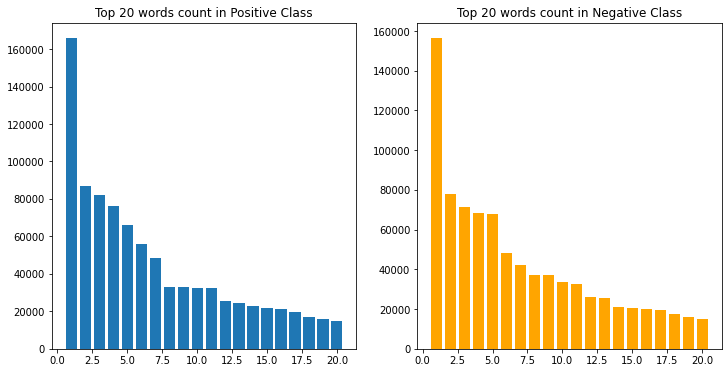

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

keys = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
axes[0].bar(keys,val1, align="center")
axes[0].set_title("Top 20 words count in Positive Class")

axes[1].bar(keys,val2, align="center",color='orange')
axes[1].set_title("Top 20 words count in Negative Class")

In [ ]:
import copy
p_train=dict(Tokenization(train_p))
n_train=dict(Tokenization(train_n))
trp_copy = copy.deepcopy(p_train)
trn_copy = copy.deepcopy(n_train)
for k in trp_copy.keys():
  if k in stop_words:
    del p_train[k]
for k in trn_copy.keys():
  if k in stop_words:
    del n_train[k]

val1 = np.zeros(20)
val2 = np.zeros(20)
print("\tWITHOUT STOP WORDS")
print()


count = 0
for i in p_train.keys():
  print(i,end= "     ")
  val1[count]=dic1[i]
  count+=1
  if(count == 20):
    break
count = 0
print()
print()

for i in n_train.keys():
  print(i,end= "      ")
  val2[count] = dic2[i]
  count+=1
  if(count == 20):
    break
print()


	WITHOUT STOP WORDS

film     movie     one     like     good     great     see     really     would     story     also     -     even     much     first     get     time     well     best     />the     

movie      film      one      like      even      would      good      really      bad      see      get      -      much      could      make      people      time      made      first      story      


Text(0.5, 1.0, 'Top 20 words count in Negative Class')

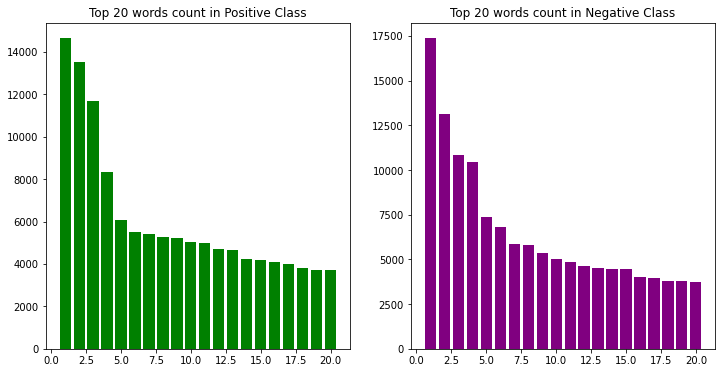

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

keys = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
axes[0].bar(keys,val1, align="center",color='green')
axes[0].set_title("Top 20 words count in Positive Class")

axes[1].bar(keys,val2, align="center",color='purple')
axes[1].set_title("Top 20 words count in Negative Class")

# **TASK 2(Bag of Words)**

### Predicting the Similarity between Reviews using BOW Technique

In [ ]:
pp = read_test_files(train_pos)
nn = read_test_files(train_neg) 

In [ ]:
#This function creates list of all documents [[d1],[d2],[d3]......]
def Get_document(pp,nn):
  documents=[]
  k=0
  for i in range(5):
    temp=[]
    temp.append(pp[i][k])
    documents.append(temp)
    temp=[]
    temp.append(nn[i][k])
    documents.append(temp)
  return documents

documents=Get_document(pp,nn)
tdocuments = Get_document(test_p,test_n)

[["I first saw this film around ten years ago and I thought it was very funny indeed. It was not as bad as some critics were making it out to be. The fact that it was written by the usually dependable John Hughes shows that you can at least expect some funny dialogue. (By the way, I also think Weird Science is quite good which was also penned in lightning speed by Hughes).<br /><br />The film has a very garish look to it using all the primary colours - reds, yellows etc - which makes it look quite unique. The cast are also quite good. The prudish Bunny Packard and the devil-possessed Delores Salk are a stand out.<br /><br />The film has certainly dated a little but I personally prefer it to all the other 'Lampoon' series."], ['Wow, after trashing the disk of Timo Roses "Rout City" after about 15 Minutes (South Park is about more than meaningless cursing... I guess some people just don\'t get it) I was interested in this movie. I read quite some positive stuff and the packaging and look

In [ ]:
def Tokenize(documents):
  documents_tokens=[]
  for i in range(len(documents)):
    documents_tokens.append(Tokenization(documents[i][0]))
  return documents_tokens
  
documents_tokens=Tokenize(documents)
tdocuments_tokens=Tokenize(tdocuments)
print(tdocuments_tokens[1])

[('the', 14), ('of', 7), ('it', 6), ('is', 5), ('in', 5), ('was', 4), ('a', 4), ('that', 3), ('there', 3), ('not', 3), ('to', 3), ('film', 2), ('for', 2), ('at', 2), ('film,', 2), ('dialogue', 2), ('would', 2), ('no', 2), ('attempt', 2), ('only', 1), ('redeeming', 1), ('quality', 1), ('this', 1), ('shows', 1), ('bands', 1), ('and', 1), ('their', 1), ('music', 1), ('when', 1), ('changing', 1), ('ny', 1), ('during', 1), ("'81.", 1), ('as', 1), ('itself', 1), ('has', 1), ('least', 1), ('three', 1), ('major', 1), ('flaws.', 1), ('first', 1), ('all,', 1), ('narration', 1), ('throughout', 1), ('which', 1), ('required', 1), ('all.', 1), ('few', 1), ('places', 1), ('where', 1), ('some', 1), ('explanation', 1), ('necessary', 1), ('just', 1), ('adding', 1), ('little', 1), ('have', 1), ('gone', 1), ('long', 1), ('way.', 1), ('secondly,', 1), ('obvious', 1), ('synchronize', 1), ('any', 1), ('audio,', 1), ('fact', 1), ('quite', 1), ('apparent', 1), ('most', 1), ('recorded', 1), ('later', 1), ('with

In [ ]:
#create lists of all words W = [.......]
def Word_list(documents_tokens):
  i=0
  k=0
  W=[]
  for item in range(len(documents_tokens)):
    for j in range(len(documents_tokens[i])):
      if documents_tokens[i][j][k] not in W:
        W.append(documents_tokens[i][j][k])
    i+=1
  return W
W = Word_list(documents_tokens)  


In [ ]:
#Create vectors for all documents [[v1],[v2],[v3]......]
def Create_Vectors(documents_tokens,W):
  vv=[]
  temp=[]
  character=0
  value=1
  for i in range(len(documents_tokens)):
    j=0
    while(j<len(W) and j<len(documents_tokens[i])):
      if W[j] in documents_tokens[i][j][character]:
        temp.append(documents_tokens[i][j][value])
      else:
        temp.append(0)
      j+=1
    while(j<len(W)):
      temp.append(0)
      j+=1
    vv.append(temp)
    temp=[]
  return vv
vv = Create_Vectors(documents_tokens,W)
tvv = Create_Vectors(tdocuments_tokens,W)
print(vv[0][0])

8


**Cosine Similarity**

In [ ]:
print(len(tvv))
# cosine formula  
for i in range(len(tvv)): 
  c=0
  res=0
  for k in range(len(vv)):
    for j in range(len(W)):
          c+= vv[k][j]*tvv[i][j] 
    cosine = c / (float((sum(vv[k])**2) *  (sum(tvv[i])**2)**0.5) +1)     
    if(cosine > res):
      t1=i
      t2=k
      res=cosine
  
  print("Similiar Reviews:",tdocuments[t1], "and", documents[t2],)
  print("Similarity: ",res)    


10
Similiar Reviews: ['My giving this film a score of 8 is relative to other feature-length films from 1930. By the standards of films made just a few years later, this film might receive a score of only 6 or 7--mostly because the sound quality was so poor. Now it is possible that the film sounded better and the Fox Movie Channel did show a degraded print (it DID have a lot of lines and scratches), but I assume the sound problem was always an issue. That\'s because sound in movies was still a novelty in 1930 and many of the Hollywood talking pictures of 1930 sounded terrible--with background characters often drowning out the leads, characters huddled together to make sure they are picked up by the microphones or inconsistent quality (such as what was seen in THE BISHOP MURDER CASE, HELL\'S ANGELS and other films of the day). This was all made much worse in THE BIG TRAIL because most of the film was shot outside--something unheard of at the time. Quite an innovation but also something t